In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = '/Users/satyajit/Desktop/IS 733/space_missions.csv'

# Load the dataset
df = pd.read_csv(data_path, encoding='latin-1')

print(df.head())


     Company                                   Location        Date      Time  \
0  RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-10-04  19:28:00   
1  RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-11-03  02:30:00   
2    US Navy   LC-18A, Cape Canaveral AFS, Florida, USA  1957-12-06  16:44:00   
3       AMBA   LC-26A, Cape Canaveral AFS, Florida, USA  1958-02-01  03:48:00   
4    US Navy   LC-18A, Cape Canaveral AFS, Florida, USA  1958-02-05  07:33:00   

           Rocket         Mission RocketStatus Price MissionStatus  
0  Sputnik 8K71PS       Sputnik-1      Retired   NaN       Success  
1  Sputnik 8K71PS       Sputnik-2      Retired   NaN       Success  
2        Vanguard    Vanguard TV3      Retired   NaN       Failure  
3          Juno I      Explorer 1      Retired   NaN       Success  
4        Vanguard  Vanguard TV3BU      Retired   NaN       Failure  


Analyze Rocket Launches Over Time

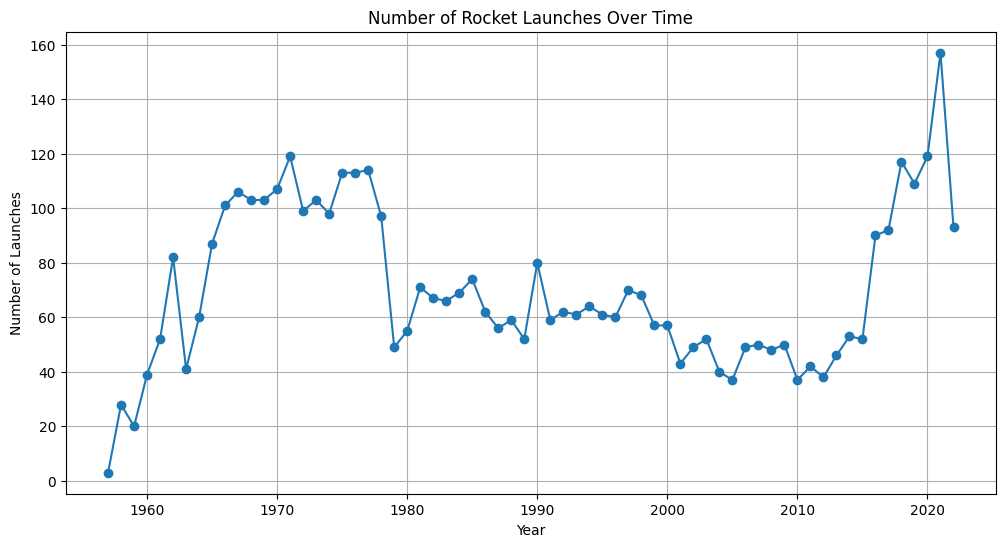

In [5]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group by year and count the number of launches
launches_per_year = df.groupby('Year').size()

# Plot the number of launches per year
plt.figure(figsize=(12, 6))
plt.plot(launches_per_year.index, launches_per_year.values, marker='o')
plt.title('Number of Rocket Launches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.show()

Analyze Mission Success Rate Over Time

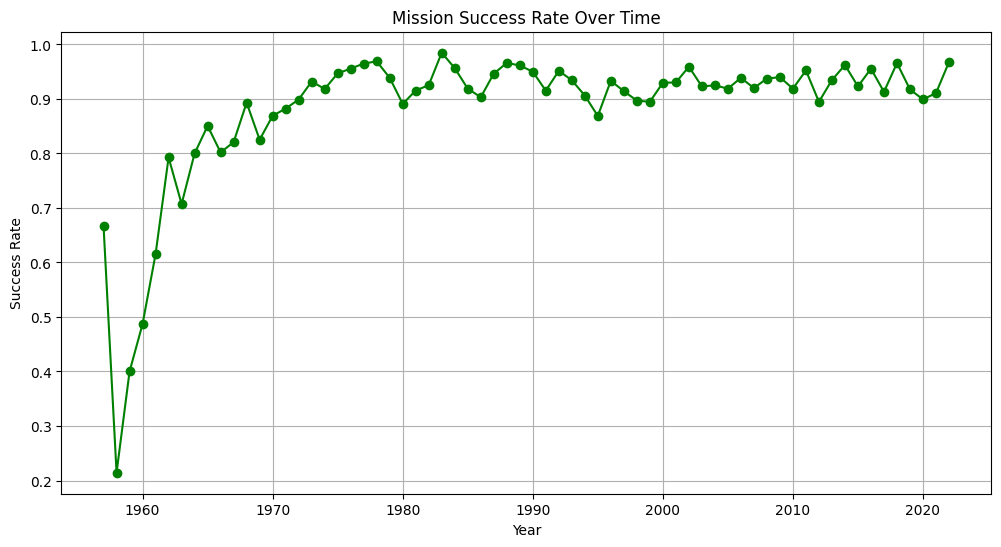

In [6]:
# Calculate the success rate per year
success_rate = df.groupby('Year')['MissionStatus'].apply(lambda x: (x == 'Success').mean())

# Plot the success rate over time
plt.figure(figsize=(12, 6))
plt.plot(success_rate.index, success_rate.values, marker='o', color='green')
plt.title('Mission Success Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.grid(True)
plt.show()

Analyze Countries with the Most Successful Missions

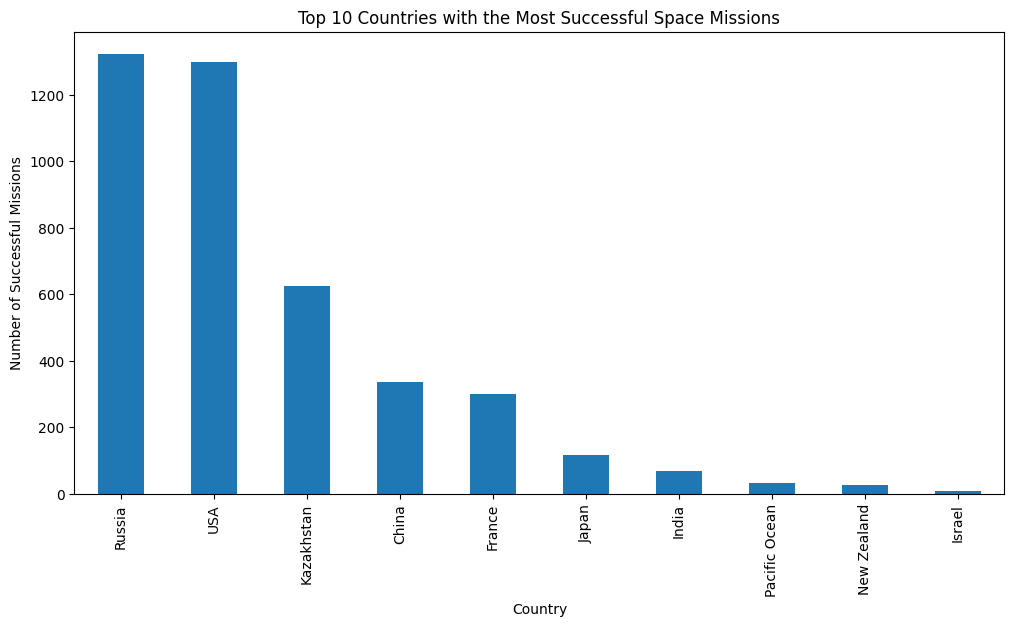

In [7]:
# Extract the country from the 'Location' column
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())

# Group by country and count the number of successful missions
successful_missions_by_country = df[df['MissionStatus'] == 'Success'].groupby('Country').size()

# Sort and plot the top 10 countries
successful_missions_by_country.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Countries with the Most Successful Space Missions')
plt.xlabel('Country')
plt.ylabel('Number of Successful Missions')
plt.show()

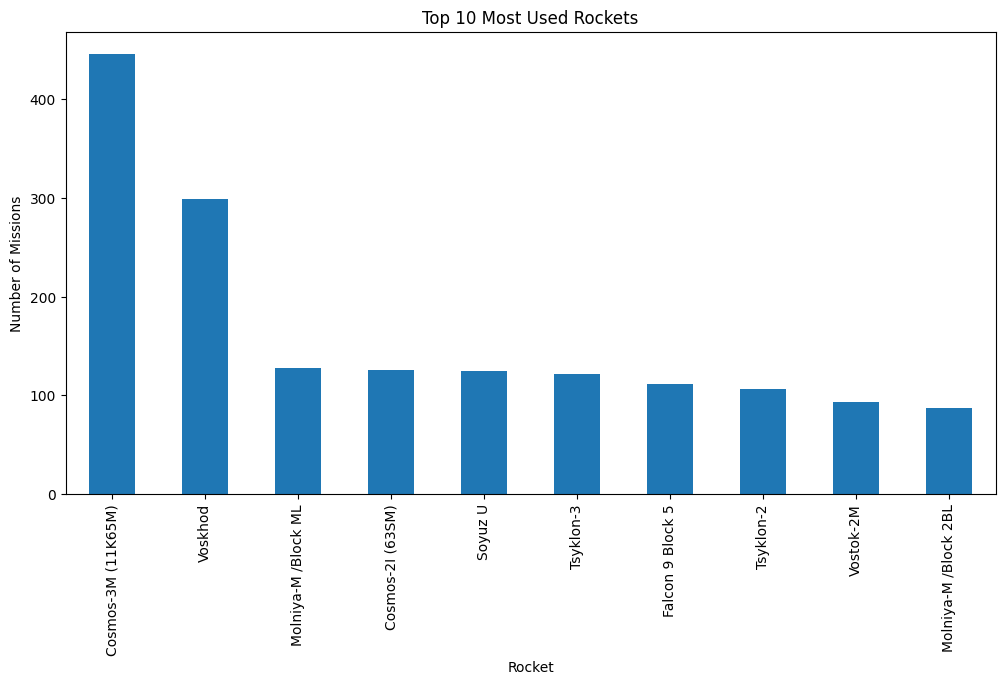

In [8]:
# Group by rocket and count the number of missions
missions_by_rocket = df.groupby('Rocket').size()

# Sort and plot the top 10 most used rockets
missions_by_rocket.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Most Used Rockets')
plt.xlabel('Rocket')
plt.ylabel('Number of Missions')
plt.show()

Analyze Launch Locations

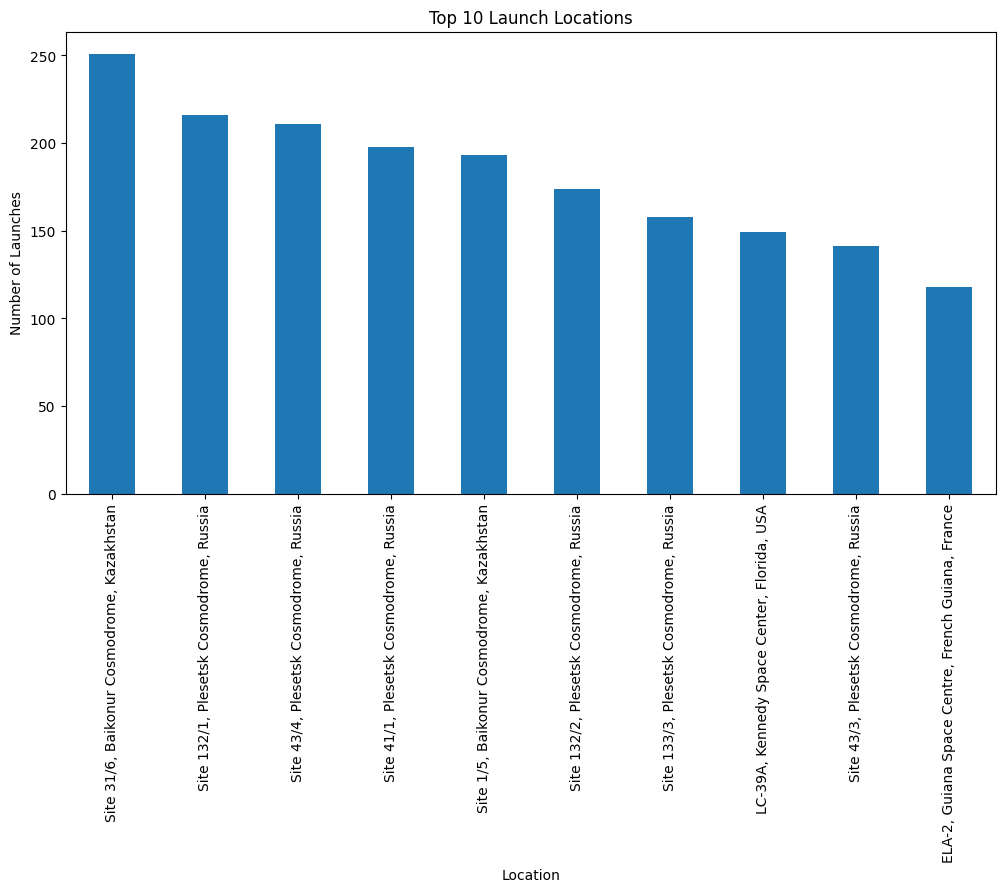

In [9]:
# Group by location and count the number of launches
launches_by_location = df.groupby('Location').size()

# Sort and plot the top 10 launch locations
launches_by_location.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Launch Locations')
plt.xlabel('Location')
plt.ylabel('Number of Launches')
plt.show()

Additional Insights (Private Sector Growth)

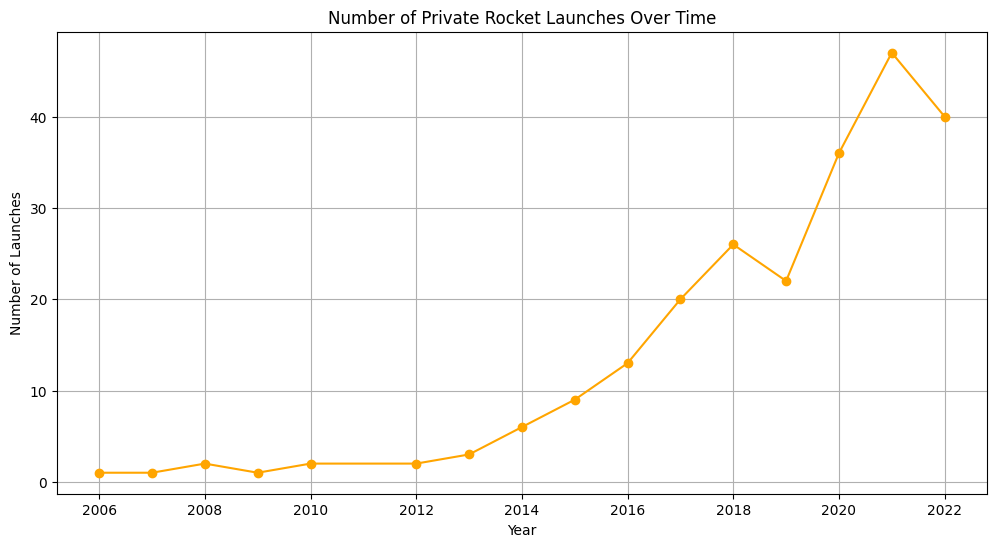

In [10]:
# Filter for private companies (e.g., SpaceX)
private_companies = ['SpaceX', 'Blue Origin', 'Rocket Lab']

# Filter the dataframe for private companies
private_missions = df[df['Company'].isin(private_companies)]

# Group by year and count the number of private launches
private_launches_per_year = private_missions.groupby('Year').size()

# Plot the number of private launches per year
plt.figure(figsize=(12, 6))
plt.plot(private_launches_per_year.index, private_launches_per_year.values, marker='o', color='orange')
plt.title('Number of Private Rocket Launches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.show()